### Multi-label classification
### Multi-output 

**Multi-label image classification** have more than one label for a single image. The training part will be similar to that of a multi-class problem. We will pass the training images and their corresponding true labels and also the validation set to validate our model’s performance. We want the probabilities to be independent of each other. so we use the **sigmoid activation function**. This will predict the probability for each class independently. It will internally create n models (n here is the total number of classes), one for each class and predict the probability for each class. so probabilities of the image belongs to class 1 or not, it will use the **binary_crossentropy loss**.  
1. Load and pre-process the data.
2. Define the model’s architecture.
3. Train the model.
4. Make predictions.

### 1. Load and pre-process the data.

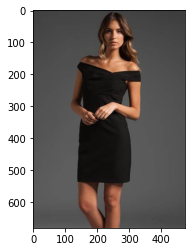

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import re
from tensorflow.keras.preprocessing.image import load_img
image = load_img("../input/apparel-images-dataset/black_dress/0561718aec3cca983c7397d03204c20d641f02b9.jpg")
plt.imshow(image)
# black_dress

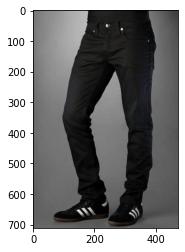

In [4]:
image = load_img("../input/apparel-images-dataset/black_pants/00a2c27ab296e6c2f7220f38c68ef3d11bdd25bd.jpg")
plt.imshow(image)
# black_pants

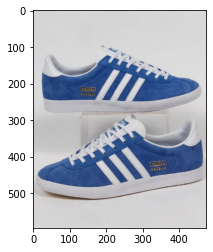

In [5]:
image = load_img("../input/apparel-images-dataset/blue_shoes/01f281f7e79d7758c673ce8644636396396346e0.jpg")
plt.imshow(image)
# blue_shoes

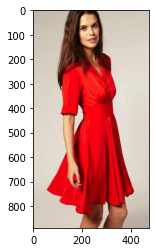

In [6]:
image = load_img("../input/apparel-images-dataset/red_dress/037c590a5e5e1dbf85f151e0626908d22a70a5b3.jpg")
plt.imshow(image)
# red_dress

In [7]:
import cv2 as cv
import re
input_shape=(96,96,3) # input shape height, width & channel - 3 for colored image
X=[]
y=[]
filenames='../input/apparel-images-dataset'
for folder in os.listdir(filenames):
    folder_path = os.path.join(filenames, folder)
    for i in os.listdir(folder_path):
        path_to_image = os.path.join(folder_path, i)
        image = cv.imread(path_to_image)
        # Resizing image
        image = cv.resize(image, (input_shape[1], input_shape[0]))
        labels = re.findall(r'\w+\_\w+', path_to_image) # Gives us ['blue_dress'] 
        labels = labels[0].split('_') # Gives us ['blue', 'dress']
        # image=image/255.0
        X.append(image)
        y.append(labels)
df = pd.DataFrame({
    'filename': filenames,
    'y': y,
    'X': X
})
df.head(5)

,filename,y,X
0,../input/apparel-images-dataset,"[white, pants]","[[[189, 189, 189], [190, 190, 190], [190, 190,..."
1,../input/apparel-images-dataset,"[white, pants]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,../input/apparel-images-dataset,"[white, pants]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,../input/apparel-images-dataset,"[white, pants]","[[[155, 161, 166], [154, 160, 165], [156, 162,..."
4,../input/apparel-images-dataset,"[white, pants]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [8]:
# Convert X to numpy array and scale values between 0 and 1
X = np.array(X)

In [9]:
X.shape # 11385 images, 128 width and height, 3 channels

(11385, 96, 96, 3)

In [10]:
X.shape[1]

96

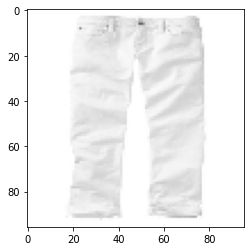

In [11]:
from tensorflow.keras.preprocessing import image
plt.imshow(X[2])

In [12]:
df['y'][2]

['white', 'pants']

**multi-label dataset**
   * First take out the unique labels in our dataset 
   * 'dress','pants','shirt','shoes', 'shorts', 'black', 'blue', 'brown', 'green', 'red', 'white'
   *  11 unique tags in the data
   *  replace the current target variable with multiple target variables
    

In [13]:
#importing MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
#Encode the multilabel data in MLB Format
y = mlb.fit_transform(df['y'])

In [14]:
y[:2]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [15]:
mlb.classes_ # 11 classes

array(['black', 'blue', 'brown', 'dress', 'green', 'pants', 'red',
       'shirt', 'shoes', 'shorts', 'white'], dtype=object)

In [16]:
# Retrieve the labels using the codes
c = mlb.inverse_transform(y)
c[:2]

[('pants', 'white'), ('pants', 'white')]

In [17]:
y= np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

### 2. Define the model’s architecture.

In [20]:
# get the model
def get_model():
    model =Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation="relu", input_shape=(96,96,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=(5, 5), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(mlb.classes_), activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
# fit the model 
epochs=3
model = get_model()
H=model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=64)

2021-10-22 05:59:40.436349: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-22 05:59:40.449866: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200210000 Hz


Epoch 1/3
125/125 [==============================] - 141s 1s/step - loss: 0.6142 - accuracy: 0.2273 - val_loss: 0.3442 - val_accuracy: 0.4614
Epoch 2/3
125/125 [==============================] - 146s 1s/step - loss: 0.3523 - accuracy: 0.4177 - val_loss: 0.2311 - val_accuracy: 0.5767
Epoch 3/3
125/125 [==============================] - 142s 1s/step - loss: 0.2822 - accuracy: 0.4691 - val_loss: 0.2077 - val_accuracy: 0.5910


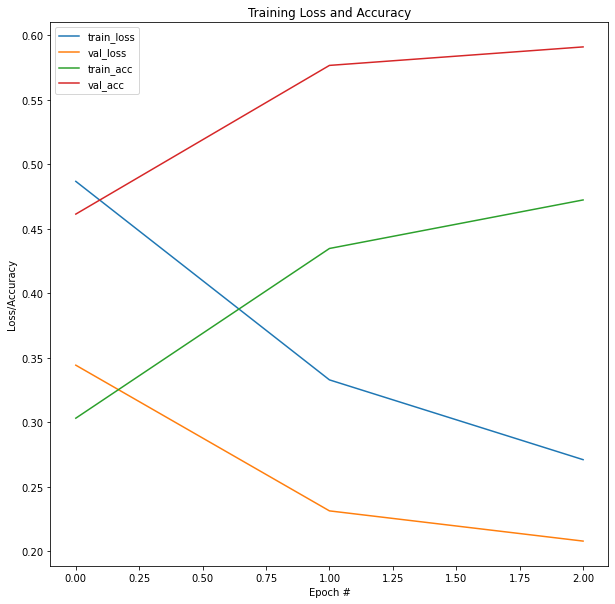

In [23]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

### 4. Make predictions.

In [24]:
df = pd.DataFrame(y,columns=mlb.classes_)
df.head(5)

,black,blue,brown,dress,green,pants,red,shirt,shoes,shorts,white
0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,1


black(0.9865057468414307)
shirt(0.42077258229255676)
shorts(0.17356109619140625)
shoes(0.13717833161354065)
dress(0.10650095343589783)
pants(0.052816182374954224)
brown(0.031519412994384766)
green(0.003822833299636841)
blue(0.0013886094093322754)
red(0.0006334185600280762)
white(0.0002504885196685791)


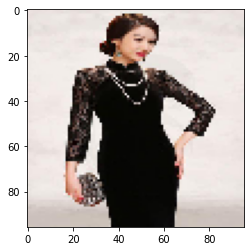

In [25]:
img = image.load_img('../input/apparel-images-dataset/black_dress/12197cde1e9ad94ca7fdaa1bca5d8dd60868155b.jpg',target_size=(96,96,3))
img = image.img_to_array(img)
img = img/255.0
classes = np.array(df.columns[:])
proba = model.predict(img.reshape(1,96,96,3))
top = np.argsort(proba[0])[::-1]
for i in range(11):
    print("{}".format(classes[top[i]])+ "({})".format(proba[0][top[i]]))
plt.imshow(img)